### Imports and functions

In [4]:
### Author: Lasse Totland 31.10.22, updated 07.02.23

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns; sns.set() 
import warnings
warnings.filterwarnings('ignore')


### Rotation spectra function ###
#data [2d array] - rpm rotation matrix 
#freq [1d array]- corresponding frequencies
#color [string] - https://matplotlib.org/stable/gallery/color/named_colors.html 
#date [string] - 'dd.mm.yy' 
#n [integer] - interpolation points
### Call this function after making a figure, before showing!

def Rotation_Spectra(data, freq, color, date, n=1000):
    # plot data
    for i in range(len(ERM)):
        plt.scatter(freq, data[i,:], color=color, marker = 'o', lw = 2)
    
    # interpolate mean data and plot
    ERM_m = np.zeros(len(freq))
    for i in list(range(len(freq))):
        ERM_m[i] = (np.mean(data[:,i])) 
    y = interp1d(freq, ERM_m)
    x = np.linspace(min(freq)+0.001, max(freq), n)
    plt.plot(x, y(x), color=color, lw = 3, label = f'Mean values, interpolated {date}')
    
    # calculate peak and turning point
    ymax = np.max(y(x))
    ymax_i = np.argmax(y(x))
    xmax = x[ymax_i]
    plt.hlines(ymax, -0.2, xmax, color = color, linestyle = 'dotted', lw = 3,
          label = f'Maxima at {round(xmax, 3)} MHz ({round(ymax, 3)} rpm)')
    
    yturn_i = np.argmin(abs(y(x))) #abs value closest to zero
    xturn = x[yturn_i]
    plt.vlines(xturn, -20, 0, color = color, linestyle = '--', lw = 3,
              label = f'Turning point at {round(xturn, 3)} MHz')
    
    return x, y, ymax, ymax_i, xmax, xturn
    #

### Data
(Consider saving data as separate .npy files?)

In [5]:
### Rotation of HeLa cells, manual recording of rotational frequency
### Solution: 

# Frequency range of signal
freq = np.array([0, 0.01, 0.1, 0.5, 1, 5, 10, 30, 40, 50]) #MHz
freq_ = np.array([0, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 30, 40, 50]) #MHz, incl 0.2
freq__ = np.array([0, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 20, 30, 40, 50]) #MHz, incl 0.2 & 20

### Electrorotation Matrix
# Each row (= len(freq)) contains measurements from one cell
# Repeats per 10 sec, multiplied with 6 gives units RPM
# Positive: clockwise, negative: anti-clockwise
# Crude, manual measurement from video-clips (mostly closest fourth)

ERM = 6*np.array([[0, 0.5, 2, 2, 0.75, 0.25, 0.25, -0.25, -0.5, -0.5], #28/10/22
               [0, 0.5, 2, 1.75, 1, 0.5, 0, -0.25, -0.25, -0.5], 
               [0, 0.25, 4, 1.5, 0.5, 0.25, 0, -0.125, -0.5, -0.5]]) 

#https://wiki.uio.no/mn/fysikk/laglivlab/index.php/11.11.2022
ERM_ = 6*np.array([0, 0.25, 1.6, 1.45, 3, 1.4, 0.5, 0.25, -0.5, -0.5, -0.6]) #11/11/22

#NB: verify these data or drop them
#https://wiki.uio.no/mn/fysikk/laglivlab/index.php/03.02.23
ERM__ = 6*np.array([[0, 0.5, 1.75, 1.25, 1, 0.5, 0.125, 0, -0.5, -1.25, -1.25, -1.75], #03/02/23
               [0, 0.5, 2.25, 1.75, 0.75, 0.75, 0, 0, 0, -1, -1.5, -1.25], 
               [0, 0.25, 1.5, 2, 0.75, 0.5, 0, 0, 0, 0, 0, -1.25]]) 

### Plotting

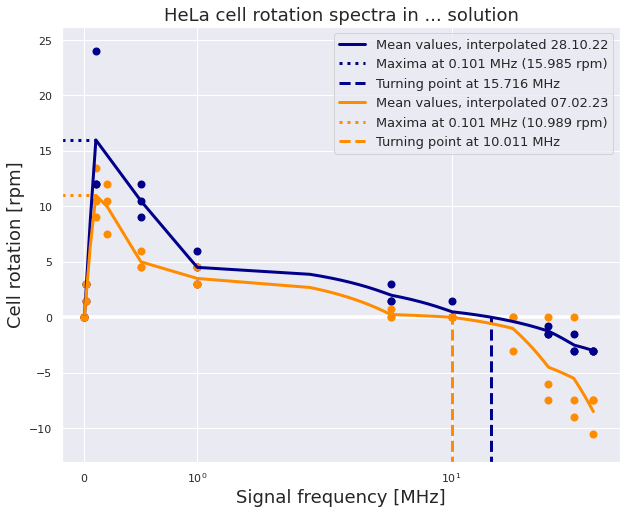

In [6]:
### Plotting approximation with original data of the two closest experiments

fig = plt.figure(figsize = (10, 8))
plt.title('HeLa cell rotation spectra in ... solution', fontsize = 18)
plt.xlabel('Signal frequency [MHz]', fontsize = 18)
plt.ylabel('Cell rotation [rpm]', fontsize = 18)
plt.xscale('symlog')

a = Rotation_Spectra(ERM, freq, 'darkblue', '28.10.22')
c = Rotation_Spectra(ERM__, freq__, 'darkorange', '07.02.23')

plt.axhline(0, color = 'white', lw = 3.5, zorder=-100)
plt.xlim(xmin = -0.2); plt.ylim(ymin = -13)
plt.grid(1); plt.legend(prop={'size': 13}); plt.show()